## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [2]:
cust_df = pd.read_csv('customer.csv')
cust_df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Data analysis

In [3]:
cust_df.shape

(200, 5)

In [4]:
cust_df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [5]:
cust_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
cust_df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [7]:
pd.crosstab(cust_df['Age'], cust_df['Gender'])

Gender,Female,Male
Age,,
18,1,3
19,2,6
20,2,3
21,4,1
22,2,1
23,6,0
24,2,2
25,1,2
26,0,2


array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

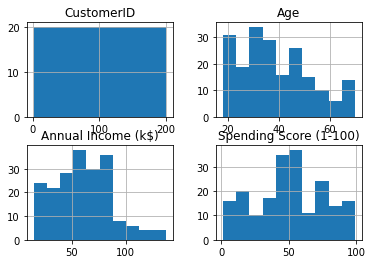

In [8]:
cust_df.hist()

## Pre-processing
As you can see, Gender in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.

In [9]:
df = cust_df[['Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# K-means Clustering

## Normalizing over the standard deviation

In [22]:
from sklearn.preprocessing import StandardScaler
x = df.values
x = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

C:\Users\Mojtabaei\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


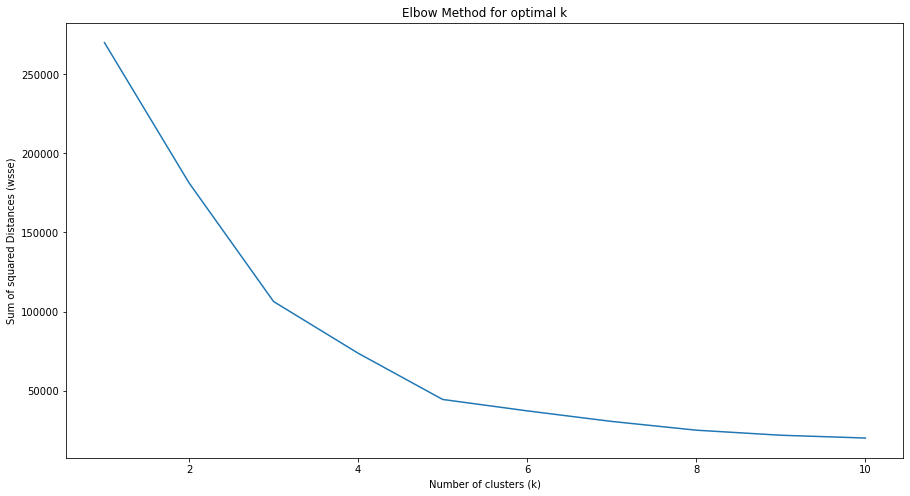

In [24]:
from sklearn.cluster import KMeans
wsse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=2)
    kmeans.fit(x)
    wsse.append(kmeans.inertia_)
    
plt.figure(figsize=(15,8))
plt.plot(range(1, 11), wsse)
plt.title('Elbow Method for optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared Distances (wsse)')
plt.show()

## According to the diagram above, the number 5 is the most suitable number for the number of clusters.

## Modeling

In [26]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=42)
k_means.fit(x)
labels = k_means.labels_
y_kmeans = k_means.fit_predict(x)
print(len(labels))
print(labels)

200
[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Insights

In [27]:
df["Clus_cust"] = labels
df.head(5)

C:\Users\Mojtabaei\AppData\Local\Temp\ipykernel_16344\279464188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clus_cust"] = labels


,Annual Income (k$),Spending Score (1-100),Clus_cust
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [28]:
df.groupby('Clus_cust').mean()

,Annual Income (k$),Spending Score (1-100)
Clus_cust,,
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


C:\Users\Mojtabaei\AppData\Local\Temp\ipykernel_16344\52611835.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)


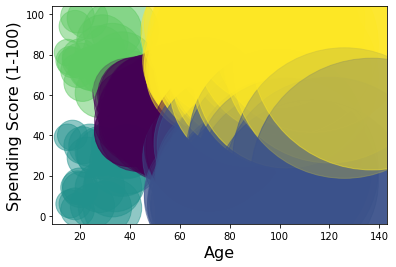

In [29]:
area = np.pi * ( X[:, 0])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Spending Score (1-100)', fontsize=16)

plt.show()

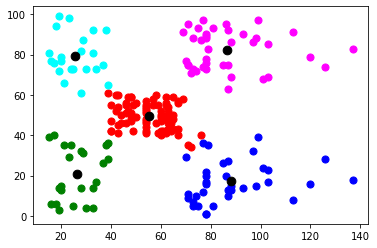

In [30]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s= 50, c = 'red', label = 'Customer 1')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s= 50, c = 'blue', label = 'Customer 2')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s= 50, c = 'green', label = 'Customer 3')

plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s= 50, c = 'cyan', label = 'Customer 4')

plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s= 50, c = 'magenta', label = 'Customer 5')

plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:, 1], s = 75, c = 'black', label = 'Centroids')

C:\Users\Mojtabaei\AppData\Local\Temp\ipykernel_16344\2926180651.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\Mojtabaei\AppData\Local\Temp\ipykernel_16344\2926180651.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 0], X[:, 1], c= labels.astype(np.float))


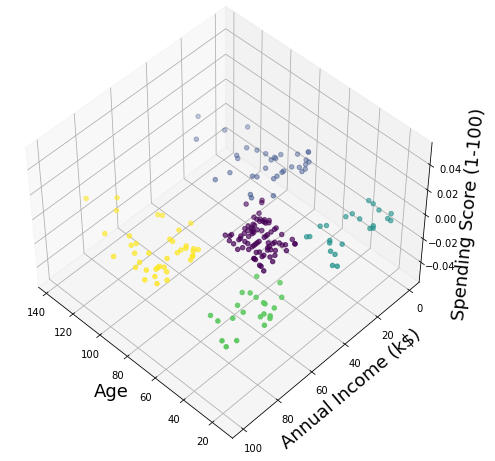

In [31]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('Age', fontsize=18)
ax.set_ylabel('Annual Income (k$)', fontsize=18)
ax.set_zlabel('Spending Score (1-100)', fontsize=18)

ax.scatter(X[:, 0], X[:, 1], c= labels.astype(np.float))

## My opinion about this algorithm according to the diagram above:
There are noises in this dataset that the K-Means algorithm is ineffective in dealing with these noises. So let's go to the next algorithms

# Hierarchical Clustering

In [32]:
x = cust_df[['Annual Income (k$)', 'Spending Score (1-100)']]

### Normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler
x = x.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918]])

# Clustering using ُScipy

In [34]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.42857143 0.33683444 ... 0.97742145 1.0227015  1.09616727]
 [0.42857143 0.         0.76535002 ... 0.91263558 1.18880836 1.00020822]
 [0.33683444 0.76535002 0.         ... 1.13772561 0.99933353 1.26531446]
 ...
 [0.97742145 0.91263558 1.13772561 ... 0.         0.57849818 0.12869934]
 [1.0227015  1.18880836 0.99933353 ... 0.57849818 0.         0.66326531]
 [1.09616727 1.00020822 1.26531446 ... 0.12869934 0.66326531 0.        ]]


In [35]:
from scipy.cluster import hierarchy 
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Mojtabaei\AppData\Local\Temp\ipykernel_16344\1713206993.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


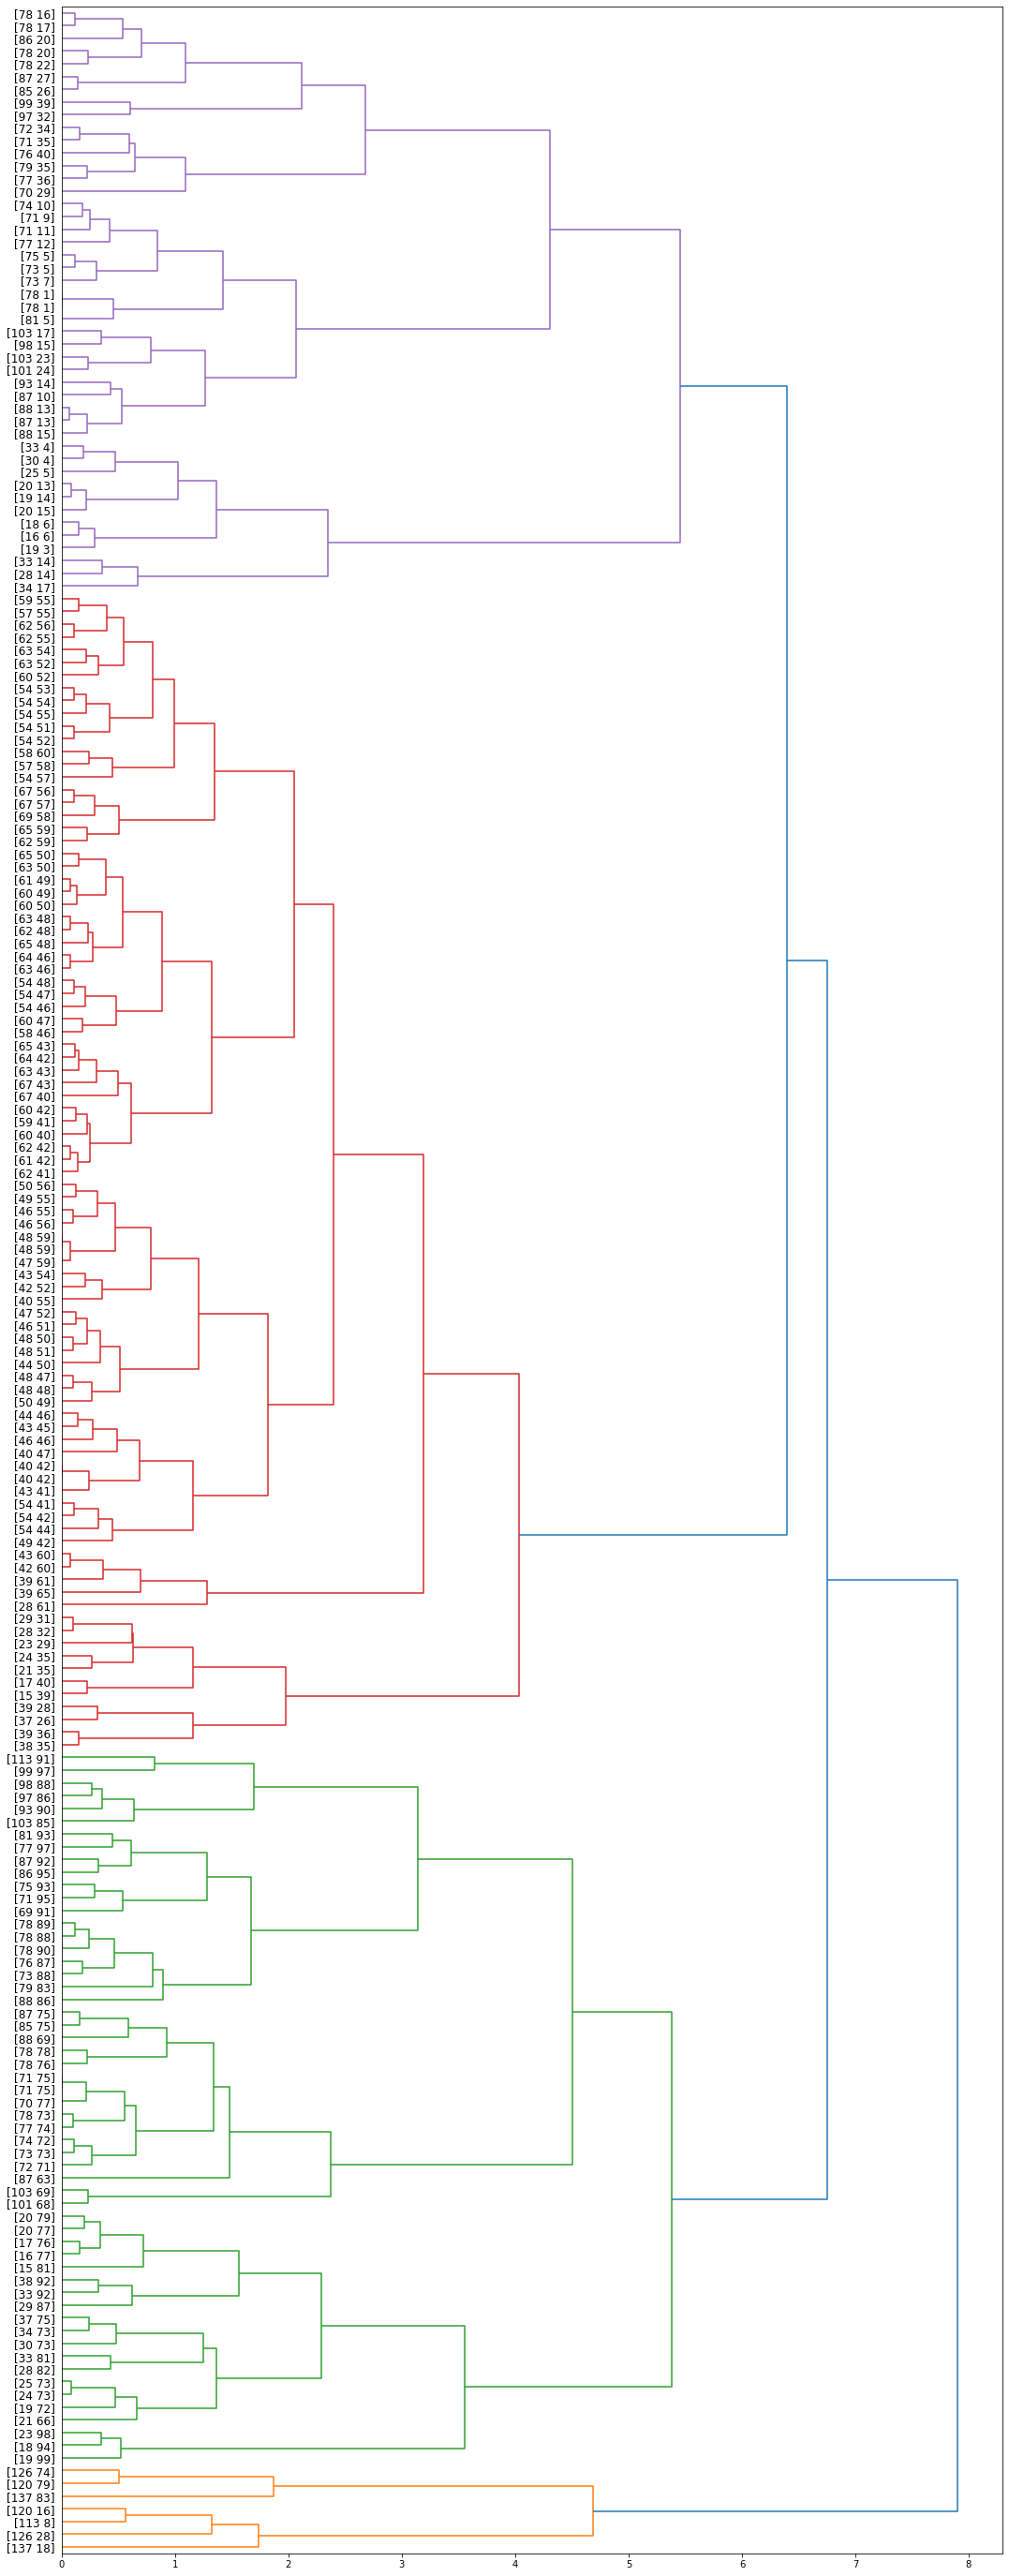

In [36]:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]' % (df['Annual Income (k$)'][id], int(float(df['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [37]:
from sklearn.cluster import AgglomerativeClustering 
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(dist_matrix)
y_hc = agglom.fit_predict(x)
agglom.labels_

C:\Users\Mojtabaei\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [38]:
df['cluster_'] = agglom.labels_
df.head()

C:\Users\Mojtabaei\AppData\Local\Temp\ipykernel_16344\112261047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_'] = agglom.labels_


,Annual Income (k$),Spending Score (1-100),Clus_cust,cluster_
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


In [155]:
agg_cust = df.groupby(['cluster_'])['Annual Income (k$)','Spending Score (1-100)','cluster_'].mean()
agg_cust

C:\Users\Mojtabaei\AppData\Local\Temp\ipykernel_11340\2696668119.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cust = df.groupby(['cluster_'])['Annual Income (k$)','Spending Score (1-100)','cluster_'].mean()


,Annual Income (k$),Spending Score (1-100),cluster_
cluster_,,,
0,86.538462,82.128205,0.0
1,55.811765,49.129412,1.0
2,89.406250,15.593750,2.0
3,25.095238,80.047619,3.0
4,26.304348,20.913043,4.0


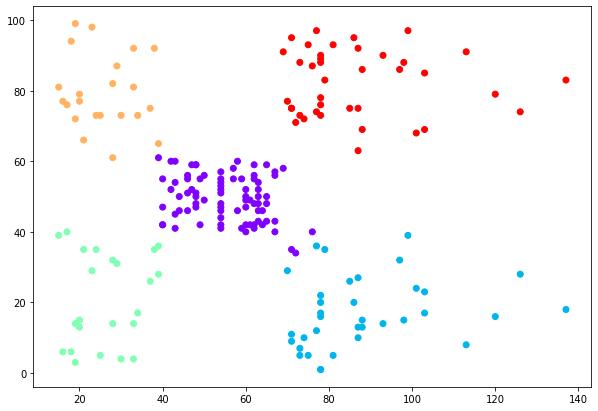

In [39]:
plt.figure(figsize=(10,7))
plt.scatter(x[:,0], x[:,1], c=labels, cmap='rainbow')

it seems that our Hierarchical model works better than K-means

## Let's make our DBSCAN model

# DBSCAN

### Data generation

In [49]:
x = cust_df[['Annual Income (k$)', 'Spending Score (1-100)']]
x = x.values

## Modeling

In [50]:
from sklearn.cluster import DBSCAN
epsilon = 0.5
minimumSamples = 5
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(x)
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

## Distinguish outliers

In [51]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [52]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

0

In [53]:
unique_labels = set(labels)
unique_labels

{-1}

## Data visualization

In [54]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

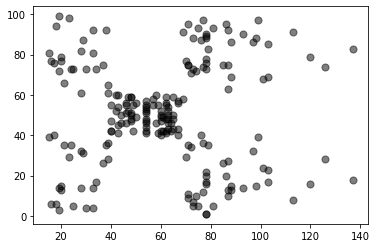

In [55]:
for k, col in zip(unique_labels, colors):
    if k == -1:

        col = 'k'

    class_member_mask = (labels == k)


    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    xy = x[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)